In [300]:
import numpy as np
import pandas as pd
import random
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score

## Load data

In [301]:
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")
x_test = np.load("x_test.npy")
# y_test = np.load("y_test.npy")

In [302]:
# 7000 data with 300 features
print(x_train.shape)
print(y_train.shape)

(7000, 300)
(7000,)


In [303]:
# It's a binary classification problem 
print(np.unique(y_train))

[0 1]


## Question 1
K-fold data partition: Implement the K-fold cross-validation function. Your function should take K as an argument and return a list of lists (len(list) should equal to K), which contains K elements. Each element is a list contains two parts, the first part contains the index of all training folds, e.g. Fold 2 to Fold 5 in split 1. The second part contains the index of validation fold, e.g. Fold 1 in  split 1

In [304]:
def cross_validation(x_train, y_train, k=5):
    datalen = x_train.shape[0]
    indexlist = [*range(datalen)]
    random.shuffle(indexlist)
    splitlen = int(datalen / k)
    result = []
    for i in range(0, k):
        trainset = indexlist[0 : i * splitlen] + indexlist[(i + 1) * splitlen : k * splitlen]
        validset = indexlist[i * splitlen : (i + 1) * splitlen]
        element = [np.array(trainset), np.array(validset)]
        result.append(element)
    return result


In [305]:
kfold_data = cross_validation(x_train, y_train, k=10)
assert len(kfold_data) == 10 # should contain 10 fold of data
assert len(kfold_data[0]) == 2 # each element should contain train fold and validation fold
assert kfold_data[0][1].shape[0] == 700 # The number of data in each validation fold should equal to training data divieded by K

## example

In [306]:
from sklearn.model_selection import KFold

X = np.arange(20)
kf = KFold(n_splits=5, shuffle=True)
kfold_data= []
for i, (train_index, val_index) in enumerate(kf.split(X)):
    print("Split: %s, Training index: %s, Validation index: %s" % (i+1, train_index, val_index))
    kfold_data.append([train_index, val_index])

Split: 1, Training index: [ 0  1  3  4  6  7  8  9 10 11 12 13 14 15 16 19], Validation index: [ 2  5 17 18]
Split: 2, Training index: [ 0  1  2  3  4  5  7  8  9 10 12 13 15 17 18 19], Validation index: [ 6 11 14 16]
Split: 3, Training index: [ 1  2  4  5  6  7  8 10 11 12 13 14 15 16 17 18], Validation index: [ 0  3  9 19]
Split: 4, Training index: [ 0  2  3  4  5  6  8  9 11 12 13 14 16 17 18 19], Validation index: [ 1  7 10 15]
Split: 5, Training index: [ 0  1  2  3  5  6  7  9 10 11 14 15 16 17 18 19], Validation index: [ 4  8 12 13]


In [307]:
assert len(kfold_data) == 5 # should contain 5 fold of data
assert len(kfold_data[0]) == 2 # each element should contains index of training fold and validation fold
assert kfold_data[0][1].shape[0] == 4 # The number of data in each validation fold should equal to training data divieded by K

## Question 2
Using sklearn.svm.SVC to train a classifier on the provided train set and conduct the grid search of “C” and “gamma” to find the best parameters by cross-validation.

In [308]:
def index2arrays(indexlist):
    datalen = len(indexlist)
    x = np.zeros((datalen, x_train.shape[1]))
    y = np.zeros(datalen)
    for i in range(datalen):
        x[i] = x_train[indexlist[i]]
        y[i] = y_train[indexlist[i]]

    return x, y

## your code
Clist = [0.1, 1, 10, 100, 1000, 10000, 100000]
gammalist = [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001]
scoregrids = np.zeros((len(gammalist), len(Clist)))
k = 5
kfold_data = cross_validation(x_train, y_train, 5)
datalen = x_train.shape[0]
bestscore = -1
bestC = -1
bestgamma = -1

i = 0
for gamma in gammalist:
    j = 0   
    for C in Clist:
        totalscore = 0
        for _k in range(0, k):
            svm = SVC(gamma=gamma, C=C)
            trainindexlist = kfold_data[_k][0]
            validindexlist = kfold_data[_k][1]

            x_train_split, y_train_split = index2arrays(trainindexlist)
            x_test_split, y_test_split = index2arrays(validindexlist)
            svm.fit(x_train_split, y_train_split)
            score = svm.score(x_test_split, y_test_split)
            totalscore += score
        avg = totalscore / k
        if avg > bestscore:
            bestscore = avg
            bestC = C
            bestgamma = gamma
        scoregrids[i][j] = avg
        j += 1
    i += 1


In [312]:
print(scoregrids)

[[0.57128571 0.57128571 0.57128571 0.57128571 0.90857143 0.93414286
  0.93914286]
 [0.57128571 0.57128571 0.57128571 0.90828571 0.93485714 0.93842857
  0.93314286]
 [0.57128571 0.57128571 0.90828571 0.93485714 0.93914286 0.93742857
  0.96871429]
 [0.57171429 0.90928571 0.93614286 0.94514286 0.976      0.98871429
  0.98842857]
 [0.91528571 0.95271429 0.98442857 0.991      0.991      0.991
  0.991     ]
 [0.97414286 0.99342857 0.99342857 0.99342857 0.99342857 0.99342857
  0.99342857]
 [0.50428571 0.57128571 0.57085714 0.57085714 0.57085714 0.57085714
  0.57085714]]


### scoregrid result: 
[[0.57128571 0.57128571 0.57128571 0.57128571 0.90857143 0.93414286
  0.93914286]
 [0.57128571 0.57128571 0.57128571 0.90828571 0.93485714 0.93842857
  0.93314286]
 [0.57128571 0.57128571 0.90828571 0.93485714 0.93914286 0.93742857
  0.96871429]
 [0.57171429 0.90928571 0.93614286 0.94514286 0.976      0.98871429
  0.98842857]
 [0.91528571 0.95271429 0.98442857 0.991      0.991      0.991
  0.991     ]
 [0.97414286 0.99342857 0.99342857 0.99342857 0.99342857 0.99342857
  0.99342857]
 [0.50428571 0.57128571 0.57085714 0.57085714 0.57085714 0.57085714
  0.57085714]]

In [310]:
best_parameters = [bestC, bestgamma]
print(bestscore)
print(best_parameters)

0.9934285714285714
[1, 0.0001]


## Question 3
Plot the grid search results of your SVM. The x, y represents the hyperparameters of “gamma” and “C”, respectively. And the color represents the average score of validation folds
You reults should be look like this reference image below ![image](https://miro.medium.com/max/1296/1*wGWTup9r4cVytB5MOnsjdQ.png) 

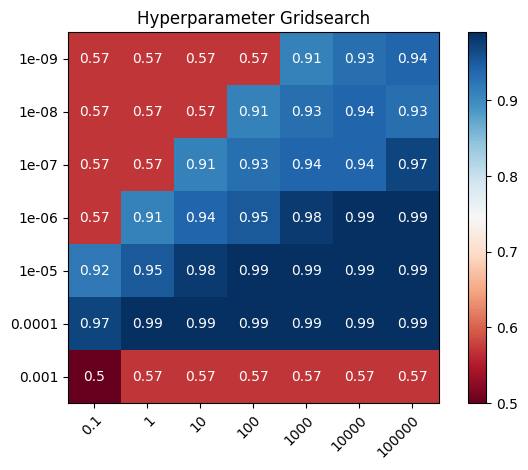

In [331]:
import matplotlib.pyplot as plt

for i in range(scoregrids.shape[0]):
    for j in range(scoregrids.shape[1]):
        scoregrids[i][j] = round(scoregrids[i][j], 2)

fig, ax = plt.subplots()
im = ax.imshow(scoregrids, cmap='RdBu')

ax.set_xticks(np.arange(len(Clist)))
ax.set_yticks(np.arange(len(gammalist)))
ax.set_xticklabels(Clist)
ax.set_yticklabels(gammalist)
ax.figure.colorbar(im, ax=ax)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(Clist)):
    for j in range(len(gammalist)):
        text = ax.text(j, i, scoregrids[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Hyperparameter Gridsearch")
fig.tight_layout()
plt.show()


## Question 4
Train your SVM model by the best parameters you found from question 2 on the whole training set and evaluate the performance on the test set.

In [335]:
best_model = SVC(gamma=best_parameters[1], C=best_parameters[0])
best_model.fit(x_train, y_train)

y_pred = best_model.predict(x_test)
np.save('y_pred.npy', y_pred)
# print("Accuracy score: ", accuracy_score(y_pred, y_test))